In [1]:
import cv2
import os
import numpy as np
import skimage.feature
import matplotlib.pyplot as plt
import pandas as pd
from random import shuffle 
import pickle
import csv 
%matplotlib inline

In [15]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, Cropping2D, Conv2DTranspose, UpSampling2D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers

In [16]:
print (os.getcwd())

/home/ubuntu/pynb/noaa-sealions


In [17]:
train_path = "/home/ubuntu/pynb/noaa-sealions/data/Train/"
train_dotted_path = "/home/ubuntu/pynb/noaa-sealions/data/TrainDotted/"
train_blob_path = "/home/ubuntu/pynb/noaa-sealions/data/TrainBlob/"
file_names = os.listdir(train_path)

In [18]:
def filter_image_files(file_names):
    for f in file_names: 
        if f.endswith('.jpg'):
            pass
        else:
            file_names.remove(f) 
            
filter_image_files(file_names)

In [19]:
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [20]:
from keras.models import load_model
full_conv_model = load_model('full_conv_model.m', custom_objects={"dice_coef_loss":dice_coef_loss, "dice_coef": dice_coef})

InternalError: Dst tensor is not initialized.
	 [[Node: Const_50 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [2,2,256,512] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'Const_50', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-98fbcc985881>", line 2, in <module>
    full_conv_model = load_model('full_conv_model.m', custom_objects={"dice_coef_loss":dice_coef_loss, "dice_coef": dice_coef})
  File "/usr/local/lib/python3.4/dist-packages/keras/models.py", line 276, in load_model
    model._make_train_function()
  File "/usr/local/lib/python3.4/dist-packages/keras/engine/training.py", line 1013, in _make_train_function
    self.total_loss)
  File "/usr/local/lib/python3.4/dist-packages/keras/optimizers.py", line 393, in get_updates
    ms = [K.zeros(shape) for shape in shapes]
  File "/usr/local/lib/python3.4/dist-packages/keras/optimizers.py", line 393, in <listcomp>
    ms = [K.zeros(shape) for shape in shapes]
  File "/usr/local/lib/python3.4/dist-packages/keras/backend/tensorflow_backend.py", line 561, in zeros
    return variable(tf.constant_initializer(0., dtype=tf_dtype)(shape),
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/init_ops.py", line 162, in __call__
    verify_shape=self.verify_shape)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/constant_op.py", line 106, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Dst tensor is not initialized.
	 [[Node: Const_50 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [2,2,256,512] values: [[[0 0 0]]]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


### Sample Images

(3744, 5616, 3)


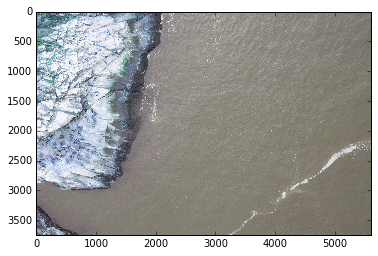

In [7]:
img = cv2.imread(train_path + file_names[0])
print (img.shape)
plt.imshow(img)
plt.show()

In [8]:
# 3328, 4992, 3
def normalize(x): 
    return (x - float(np.min(x))) / (float(np.max(x)) - float(np.min(x)))

In [9]:
def resize_1(img, size): 
    return cv2.resize(img, size) 

def resize_2(img, fx, fy): 
    return cv2.resize(img, None, fx=fx, fy=fy) 

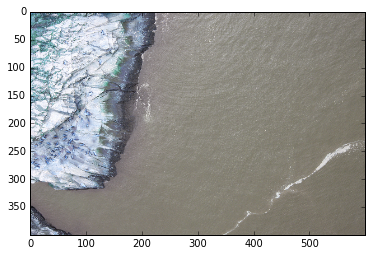

(400, 600, 3)


In [10]:
file_name = file_names[0]
img_1 = cv2.imread(train_path + file_name)
img_1 = resize_1(img_1, (600,400))
plt.imshow(img_1)
plt.show()
print (img_1.shape)

In [11]:
# def preprocess_and_save(train_path, train_blob_path): 
def preprocess(train_path, train_blob_path): 
    
    file_names = os.listdir(train_path)
    filter_image_files(file_names)
    shuffle(file_names)

    counts = dict()
    with open(train_path + 'train.csv') as csvfile: 
        next(csvfile) 
        reader = csv.reader(csvfile)
        for row in reader: 
            counts[int(row[0])] = row[1:]

    y = []
    for f in file_names: 
        name,ext = f.split('.')
        y.append(counts[int(name)])
    y = np.array(y,dtype=np.int)  
    
    
    validation_count = int(len(file_names) * 0.1) 
    
    x = [] 
    
    for f in file_names: 
        img_1 = cv2.imread(train_path + f)
        img_1 = resize_1(img_1, (600,400))
        img_1 = model.predict([img_1], batch_size=1)
        x.append(img_1)
                
    x = np.array(x)
    x = normalize(x)
                
    train_x = x[:-validation_count]
    train_y = y[:-validation_count]
    valid_x = x[-validation_count:]
    valid_y = y[-validation_count:]
    
#     from sys import platform
#     if platform != 'darwin': #OSError in MAC
#         pickle.dump((train_x, train_y), open('train.p', 'wb'))
#         pickle.dump((valid_x, valid_y), open('valid.p', 'wb'))

    return (train_x, train_y, valid_x, valid_y)

In [12]:
train_x, train_y, valid_x, valid_y = preprocess(train_path, train_blob_path)

In [13]:
print (len(train_x))
print (len(train_y))
print (len(valid_x))
print (len(valid_x))

854
854
94
94


### Neural Network

In [14]:
model = Sequential()

model.add(Conv2D(  8, (10, 10), activation='relu', strides=1, padding='same', input_shape=(400, 600, 3)))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D( 64, (10, 10), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (10, 10), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (10, 10), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(  5, activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(train_x, train_y, batch_size=4, epochs=50, verbose=2)

Epoch 1/50
24s - loss: 1972.9305
Epoch 2/50
21s - loss: 1868.7657
Epoch 3/50
21s - loss: 1830.2086
Epoch 4/50
21s - loss: 1837.7093
Epoch 5/50
21s - loss: 1827.4894
Epoch 6/50
21s - loss: 1874.3238
Epoch 7/50
21s - loss: 1816.9594
Epoch 8/50
21s - loss: 1813.8172
Epoch 9/50
21s - loss: 1798.2060
Epoch 10/50
21s - loss: 1804.0588
Epoch 11/50
21s - loss: 1814.7206
Epoch 12/50
21s - loss: 1814.2170
Epoch 13/50
21s - loss: 1750.4787
Epoch 14/50
21s - loss: 1857.6075
Epoch 15/50
21s - loss: 1760.5494
Epoch 16/50
21s - loss: 1697.2459
Epoch 17/50
21s - loss: 1654.6124
Epoch 18/50
21s - loss: 1678.6784
Epoch 19/50
21s - loss: 1675.2045
Epoch 20/50
21s - loss: 1804.5049
Epoch 21/50
21s - loss: 1833.0841
Epoch 22/50
21s - loss: 1773.4178
Epoch 23/50
21s - loss: 1705.0198
Epoch 24/50
21s - loss: 1502.7005
Epoch 25/50
21s - loss: 1615.8917
Epoch 26/50
21s - loss: 1808.1723
Epoch 27/50
21s - loss: 1775.6158
Epoch 28/50
21s - loss: 1732.1157
Epoch 29/50
21s - loss: 1647.2756
Epoch 30/50
21s - loss:

In [15]:
score = model.evaluate(valid_x, valid_y, batch_size=1)

93/94 [============================>.] - ETA: 0s

In [16]:
score

1471.2805158736858

In [32]:
test_path = "/home/ubuntu/pynb/noaa-sealions/data/Test/"
file_names = os.listdir(test_path)
print (len(file_names)) 

18636


In [34]:

header = tuple(['test_id','adult_males','subadult_males','adult_females','juveniles','pups'])
with open('submission.csv', 'wt') as csvfile:
    csvwriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    csvwriter.writerow(header)
    for f in file_names: 
        try: 
            tid, text = f.split('.')
            x = []
            img = cv2.imread(test_path + f)
            x.append(resize_1(img, (600,400))) 
            x = np.array(x) 
            vals = model.predict(x) 
            vals = vals[0].astype(np.int).tolist()
            
            for i in range(len(vals)): 
                if vals[i] < 0: 
                    vals[i] * -1
            
            res = tuple([int(tid)] + vals) 
            csvwriter.writerow(res)
        except Exception as e: 
            pass 
